In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from load_data import load_data
plt.style.use('ggplot')

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
df = load_data()

# Average Daily Offenses

/home/anders/miniconda3/envs/viz_landscape/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


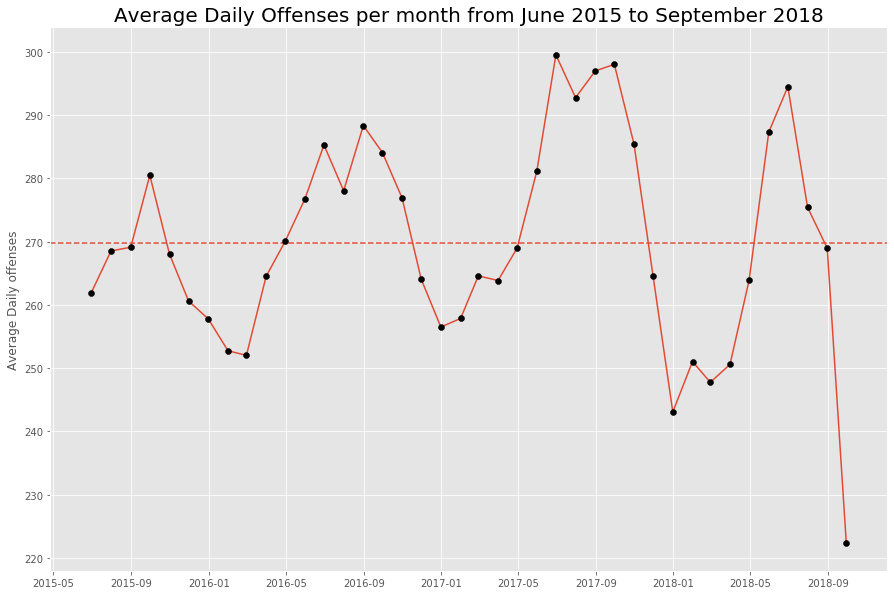

In [6]:
fig, ax = plt.subplots()
def plot_average_daily_offenses(ax):
    num_crimes_over_time = df.set_index('OCCURRED_ON_DATE').resample('D').size().resample('M').mean().rename('number_of_crimes')
    ax.plot(num_crimes_over_time.index, num_crimes_over_time.values)
    ax.scatter(num_crimes_over_time.index, num_crimes_over_time.values, color='black', zorder=3)
    ax.axhline(num_crimes_over_time.mean(), ls='--')
    ax.set_title(f"Average Daily Offenses per month from "
                 f"{num_crimes_over_time.index.min().strftime('%B %Y')} to "
                 f"{num_crimes_over_time.index.max().strftime('%B %Y')}", 
                 fontsize=20);
    ax.set_ylabel('Average Daily offenses');
    return ax
plot_average_daily_offenses(ax);

# Average Daily shootings per month

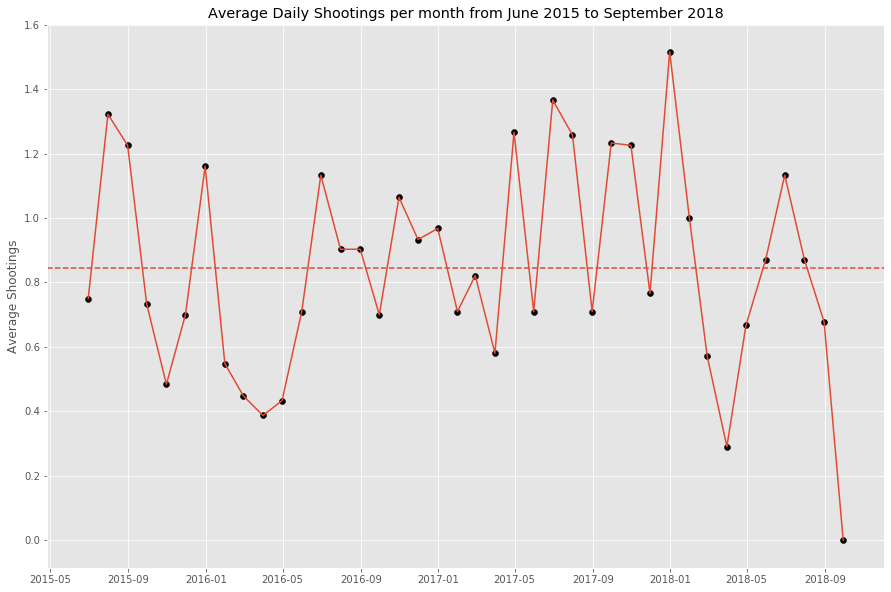

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
def plot_avg_shootings_per_day(ax):
    avg_shootings_per_month = df.resample('D', on='OCCURRED_ON_DATE')['SHOOTING'].sum().resample('M').mean()
    ax.plot(avg_shootings_per_month.index, avg_shootings_per_month.values)
    ax.scatter(avg_shootings_per_month.index, avg_shootings_per_month.values, color='black')
    ax.axhline(avg_shootings_per_month.mean(), ls='--')
    ax.set_title(f"Average Daily Shootings per month from "
                 f"{avg_shootings_per_month.index.min().strftime('%B %Y')} to "
                 f"{avg_shootings_per_month.index.max().strftime('%B %Y')}")
    ax.set_ylabel('Average Shootings')
plot_avg_shootings_per_day(ax)

# Top 10 offenses

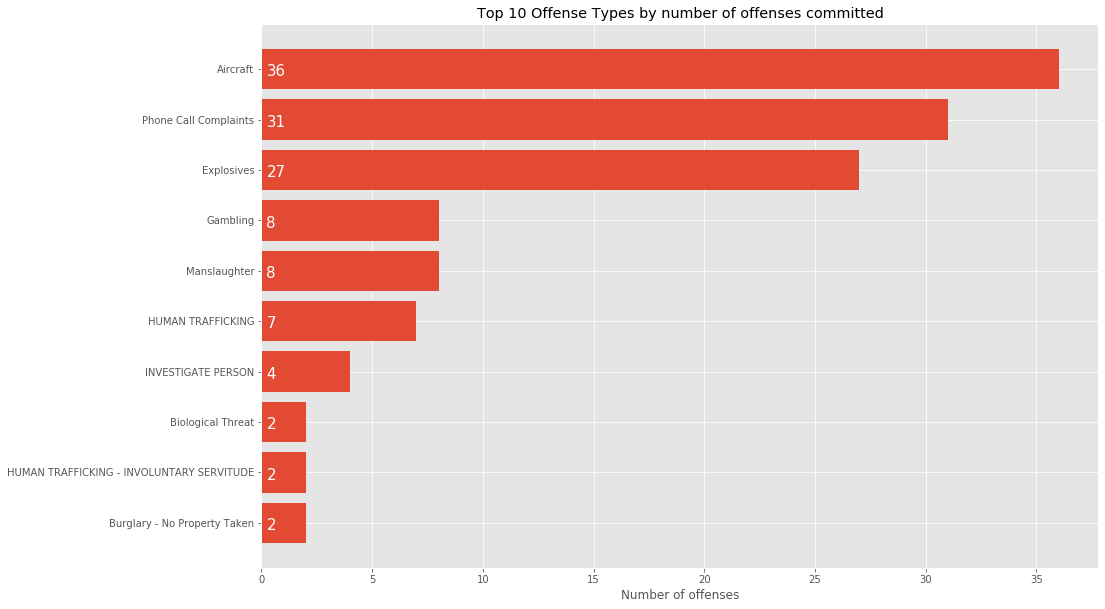

In [12]:
fig, ax = plt.subplots()
def plot_top10_groups(ax):
    crimes_per_offense = df.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True).iloc[:10]
    ax.barh(crimes_per_offense.index, crimes_per_offense)
    ax.set_title('Top 10 Offense Types by number of offenses committed')
    ax.set_xlabel('Number of offenses');
    for patch in ax.patches:
        y = patch.get_y()
        width = patch.get_width()
        ax.annotate(width, (0, y), xytext=(5, 10), textcoords='offset points', va='bottom', ha='left', color='white', fontsize=15)
    return ax
plot_top10_groups(ax);

# Distribution of offences per day of week and hour of day

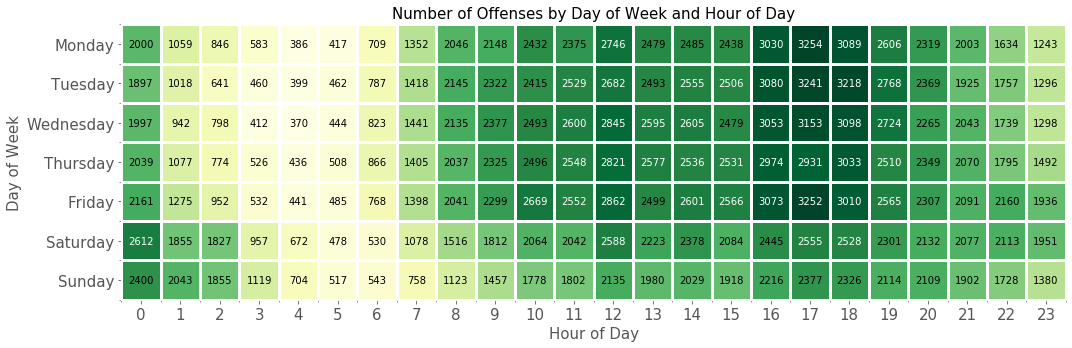

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))

def plot_heatmap(ax):
    counts = pd.crosstab(df.DAY_OF_WEEK, df.HOUR)
    im = ax.imshow(counts, cmap="YlGn")
    ax.set_xticks(np.arange(len(counts.columns)))
    ax.set_yticks(np.arange(len(counts.index)))
    ax.set_xticklabels(counts.columns, fontsize=15)
    ax.set_yticklabels(counts.index, fontsize=15)
    for i in range(len(counts.index)):
        for j in range(len(counts.columns)):
            text = ax.text(j, i, counts.loc[i, j], ha="center", va="center", color="black" if counts.loc[i, j] < 2500 else "w")
    ax.set_xticks(np.arange(counts.shape[1] +1) - .5, minor=True)
    ax.set_yticks(np.arange(counts.shape[0] +1) - .5, minor=True)
    ax.grid(None)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.set_title('Number of Offenses by Day of Week and Hour of Day', fontsize=15)
    ax.set_ylabel('Day of Week', fontsize=15)
    ax.set_xlabel('Hour of Day', fontsize=15)
    fig.tight_layout()
    return ax
plot_heatmap(ax)

/home/anders/miniconda3/envs/viz_landscape/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


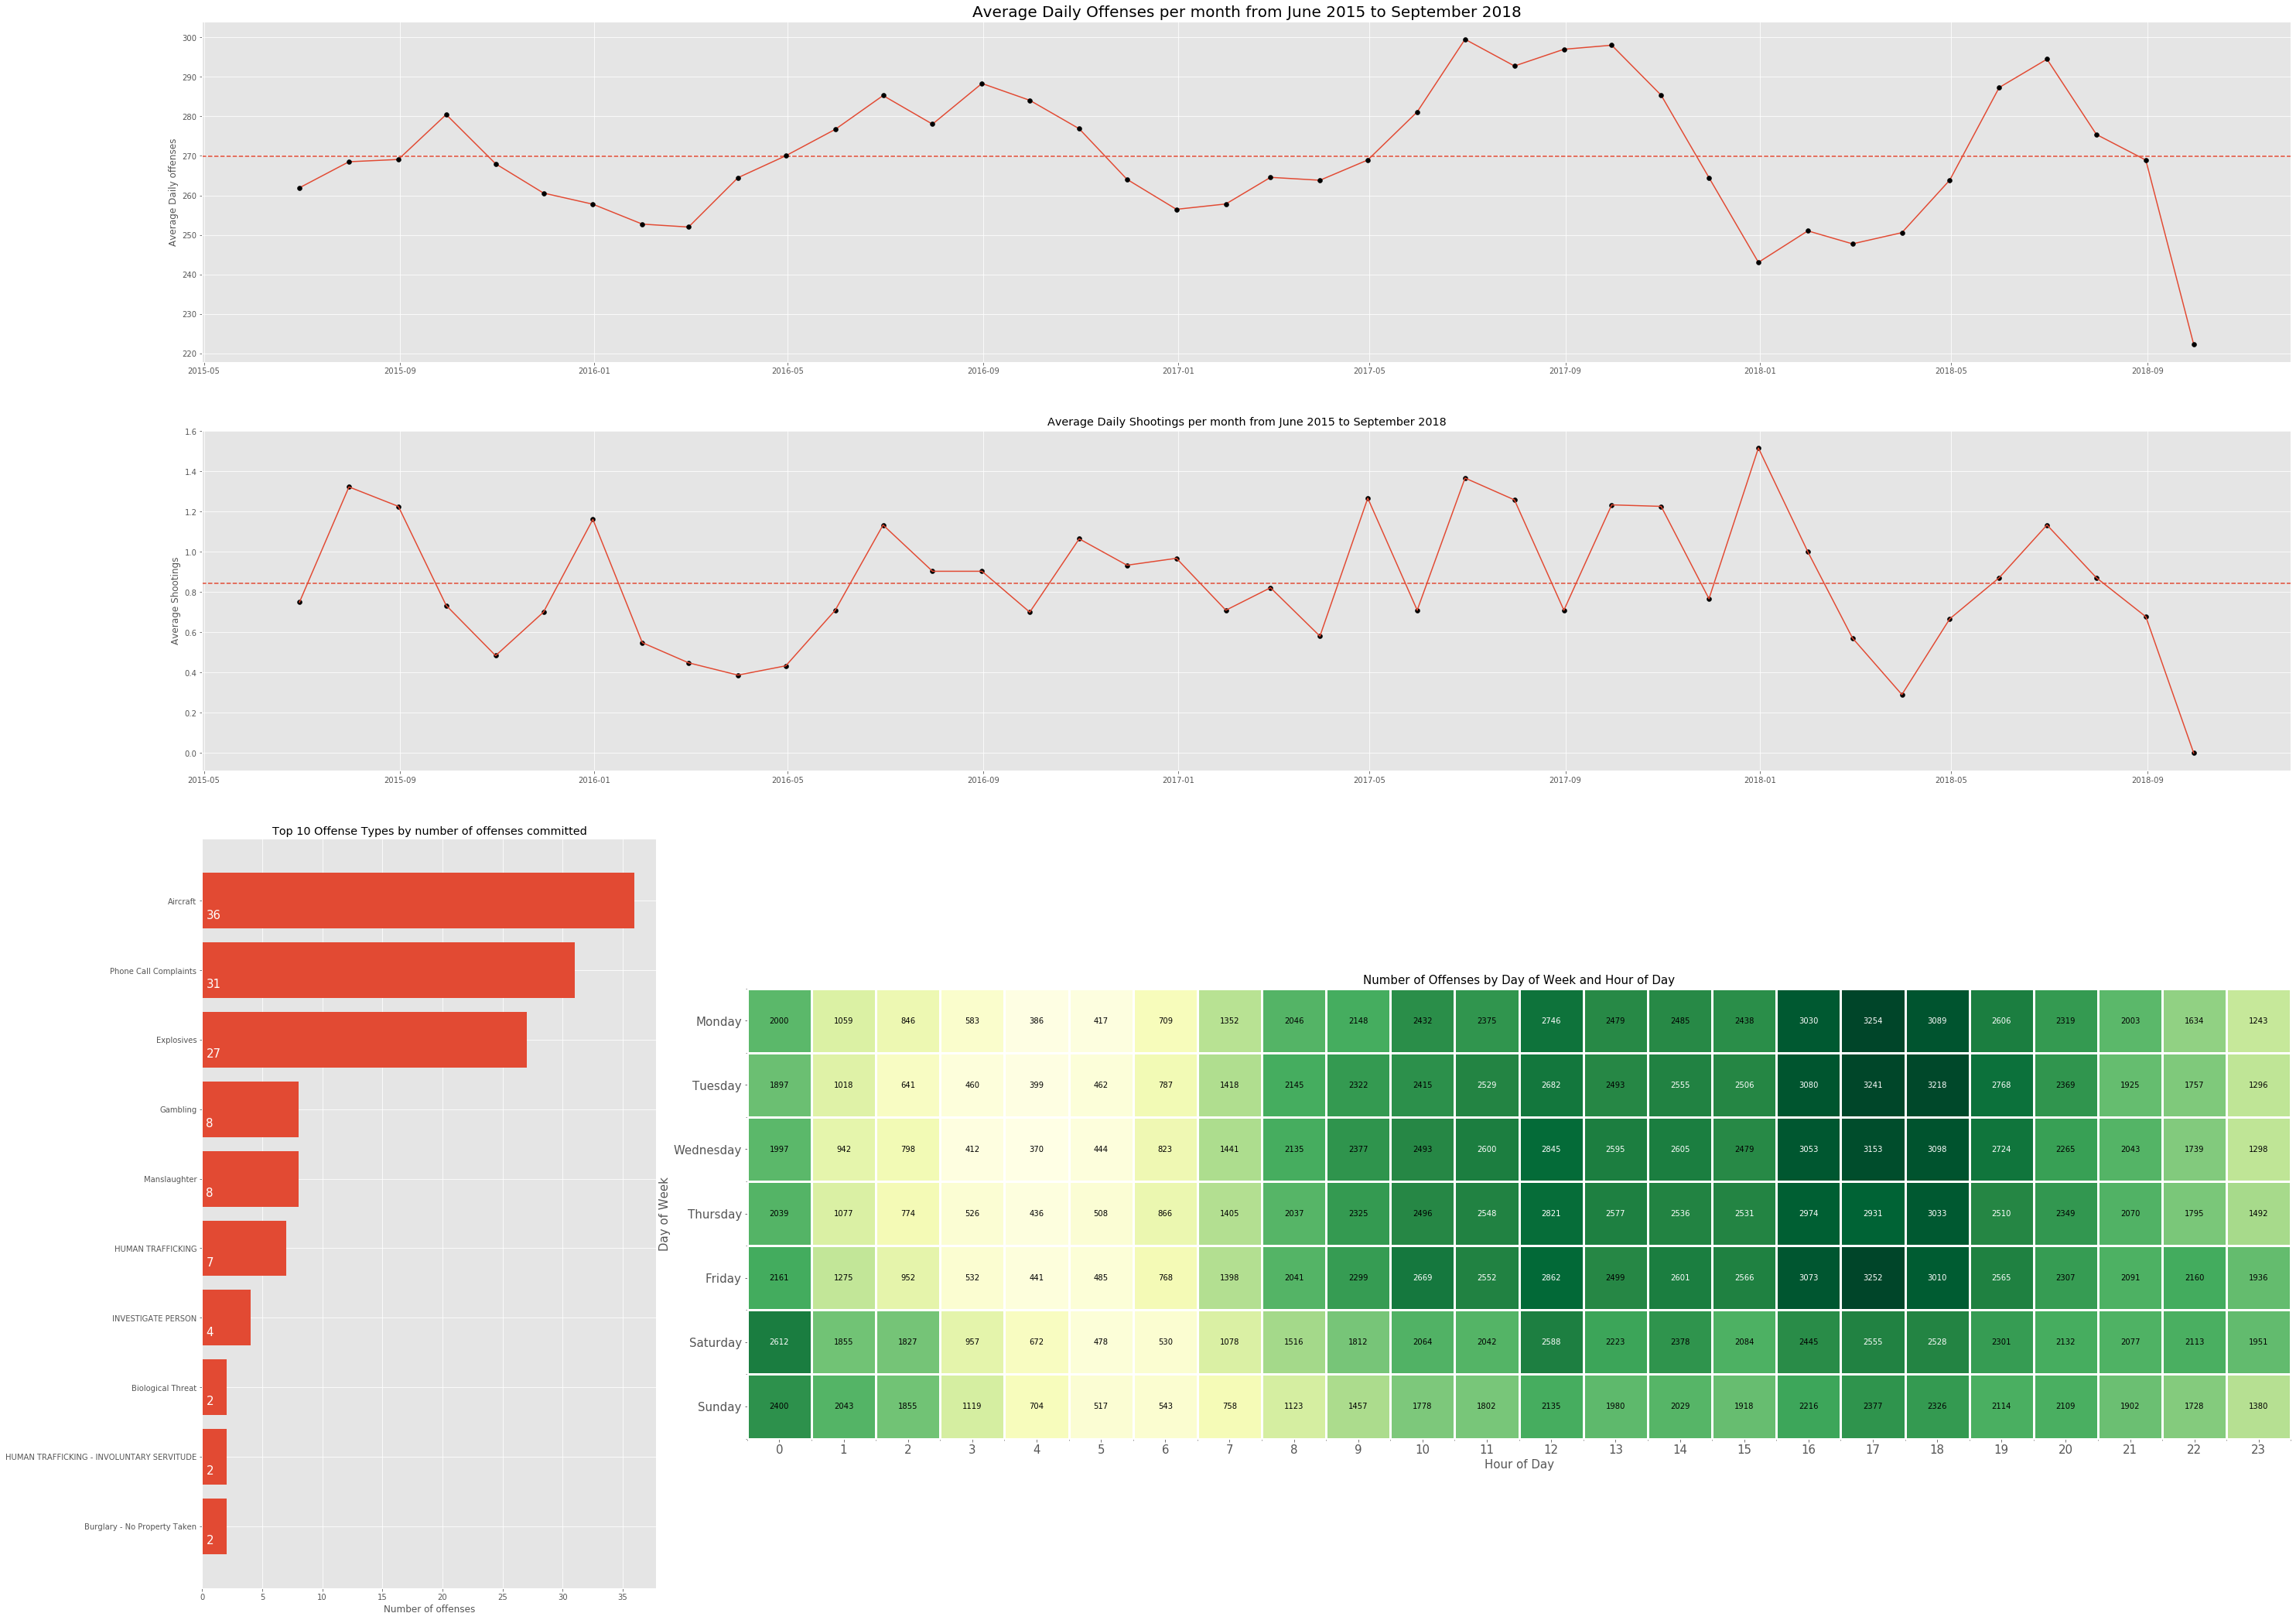

In [11]:
fig = plt.figure(figsize=(20, 15))

gs = fig.add_gridspec(4, 4, top=2.0, right=2.0, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2:, :1])
ax4 = fig.add_subplot(gs[2:, 1:])

plot_average_daily_offenses(ax1)
plot_avg_shootings_per_day(ax2)
plot_top10_groups(ax3)
plot_heatmap(ax4)